# Imports

In [1]:
from data import get_main_data
from tsmom import momentum, tsmom_return, tsmom_dates
from utils import accumulated_return
import pandas as pd
import matplotlib.pyplot as plt

# Getting Data

Data is a list of dataframes.

Each dataframe could contain multiple information for each asset:
* close price
* open price
* volume
* ...

But for the purpose of this project, we will only focus on closing price.

For more information check data.py file

In [2]:
df = pd.read_csv('../tsmom_data.csv')
df.index = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df.drop('date', axis=1)

In [3]:
df.tail()

,AN,BN,CC,CN,CT,DA,DX,EC,EN,ES,...,ZU,ZW,ZZ,DT,HS,LX,NK,SP,UB,AX
date,,,,,,,,,,,,,,,,,,,,,
2019-06-17,68.69,125.91,2479.0,74.680,66.42,16.84,97.050,97.900,7561.25,2896.25,...,52.17,539.50,83.050,171.58,26975.0,7292.5,21095.0,2896.3,134.11,12082.0
2019-06-18,68.92,126.11,2500.0,74.865,66.82,16.86,97.155,97.900,7673.50,2926.25,...,54.11,531.50,81.475,172.76,27269.0,7386.0,21210.0,2926.2,134.61,12321.5
2019-06-19,69.08,127.19,2513.0,75.375,67.16,16.98,96.580,97.995,7702.00,2933.50,...,53.97,522.25,81.625,172.53,27968.0,7331.5,21310.0,2933.4,134.45,12298.0
2019-06-20,69.40,127.48,2446.0,75.925,65.96,17.18,96.140,98.045,7772.75,2960.00,...,57.07,526.50,79.250,172.59,28338.0,7363.5,21460.0,2960.0,134.43,12361.5
2019-06-21,69.44,127.85,2502.0,75.830,65.56,17.09,95.720,98.015,7751.50,2950.50,...,57.43,526.00,76.250,172.08,28255.0,7318.0,21190.0,2950.6,134.26,12270.0


In [4]:
date_range = tsmom_dates(df)

In [5]:
len(date_range)

228

# Applying Momentum Strategy

In [7]:
assets_return = momentum(df, )#date=date_range) # momentum strategy
assets_long_only_return = momentum(df, long_only=True, )#date=date_range) # long only strategy

In [8]:
total_tsmom = tsmom_return(assets_return)
total_long_only = tsmom_return(assets_long_only_return)

In [9]:
len(total_tsmom)

228

In [10]:
#long_only_AN = accumulated_return(asset_return_long_only)
tsmom_accumulated_return = accumulated_return(total_tsmom)
long_only_accumulated_return = accumulated_return(total_long_only)

# Visualization

In [67]:
def plot_return(r1, r2):
    r = pd.DataFrame()
    r['returns'] = r1
    r.index = date_range
    
    rl = pd.DataFrame()
    rl['returns'] = r2
    rl.index = date_range
    
    plt.figure(figsize=(16,9))
    plt.plot(r, label="TSMOM", color="blue")
    plt.plot(rl, label="long only", color="red")

    plt.legend()
    #plt.title('Cumulative Excess Return of TSMOM and Diversified Passive Long')
    plt.show()

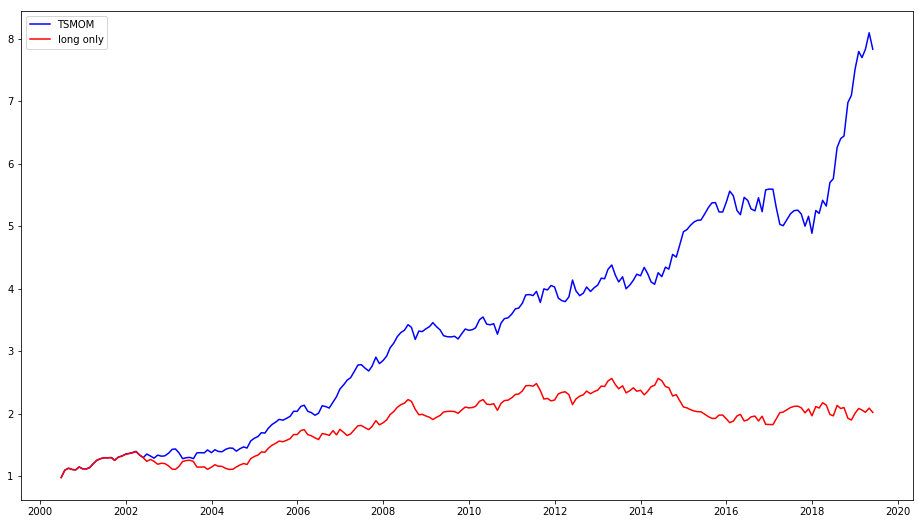

In [69]:
plot_return(
    tsmom_accumulated_return,
    long_only_accumulated_return
)

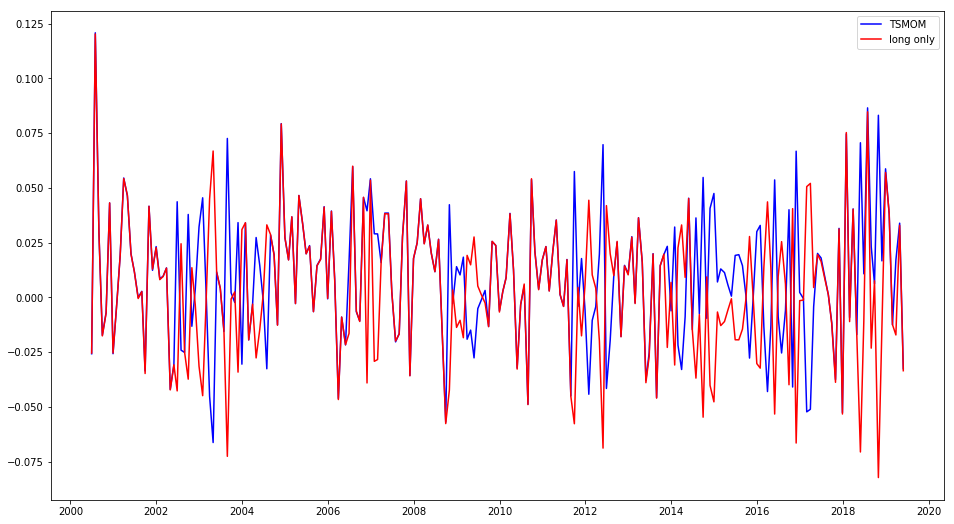

In [68]:
plot_return(
    total_tsmom,
    total_long_only
)

In [ ]:

r = pd.DataFrame(r)
rp = pd.DataFrame(rp)
r.index = date_range
rp.index = date_range

plt.figure(figsize=(16,9))

plt.plot(100*r.cumprod(), label = 'TSMOM', color='blue')
plt.plot(100*rp.cumprod(), label = 'Long only', color='red')

plt.yscale('log')
plt.legend()
plt.title('Cumulative Excess Return of TSMOM and Diversified Passive Long')
plt.show()

passive_return = float((rp.cumprod().iloc[-1] - 1)*100)
tsmom_return = float((r.cumprod().iloc[-1] - 1)*100)

print('Passive return: ', round(passive_return,2), '%', sep='')
print('TSMOM return: ', round(tsmom_return,2), '%', sep='')

In [ ]:
# plt.plot(tsmom_accumulated_return['BN'])
# #plt.plot(long_only_AN['AN'])
# plt.show()